In [1]:
import pandas as pd
sf = pd.read_csv('Urban_Traffic_Behavior.csv')
sf.head()

,Hour,Immobilized_Bus,Broken_Truck,Vehicle_Excess,Accident_Victim,Running_Over,Fire_Vehicles,Freight_Occurrence,Dangerous_Freight,Electricity_Short,Fire,Flooding,Manifestations,Trolleybuses_Defect,Tree,Semaphore_off,Intermittent_Semaphore,Slowness
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [2]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
Hour                      135 non-null int64
Immobilized_Bus           135 non-null int64
Broken_Truck              135 non-null int64
Vehicle_Excess            135 non-null int64
Accident_Victim           135 non-null int64
Running_Over              135 non-null int64
Fire_Vehicles             135 non-null int64
Freight_Occurrence        135 non-null int64
Dangerous_Freight         135 non-null int64
Electricity_Short         135 non-null int64
Fire                      135 non-null int64
Flooding                  135 non-null int64
Manifestations            135 non-null int64
Trolleybuses_Defect       135 non-null int64
Tree                      135 non-null int64
Semaphore_off             135 non-null int64
Intermittent_Semaphore    135 non-null int64
Slowness                  135 non-null float64
dtypes: float64(1), int64(17)
memory usage: 19.1 KB


In [3]:
sf.describe()

,Hour,Immobilized_Bus,Broken_Truck,Vehicle_Excess,Accident_Victim,Running_Over,Fire_Vehicles,Freight_Occurrence,Dangerous_Freight,Electricity_Short,Fire,Flooding,Manifestations,Trolleybuses_Defect,Tree,Semaphore_off,Intermittent_Semaphore,Slowness
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815,10.051852
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261,4.363243
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.400000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.850000
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000,23.400000


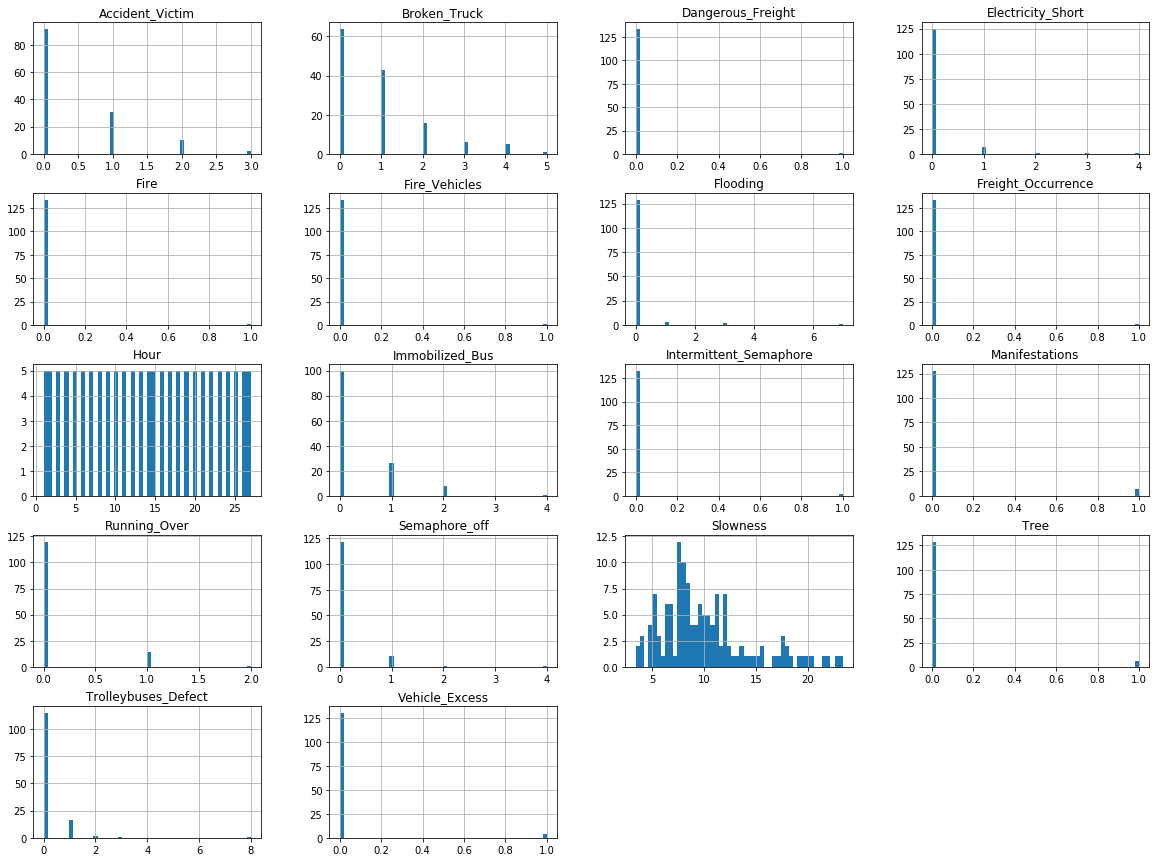

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Observations: 

1. These variables have very different scales. We will discuss this later in this chapter when we explore feature scaling.

2. Many histograms are right skewed: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

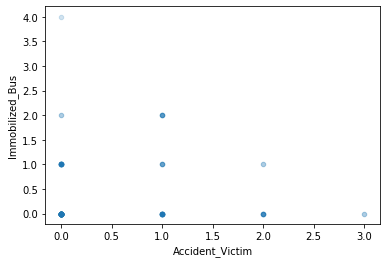

In [5]:
sf.plot(kind="scatter", x="Accident_Victim", y="Immobilized_Bus", alpha=0.2)
plt.savefig('map1.png')

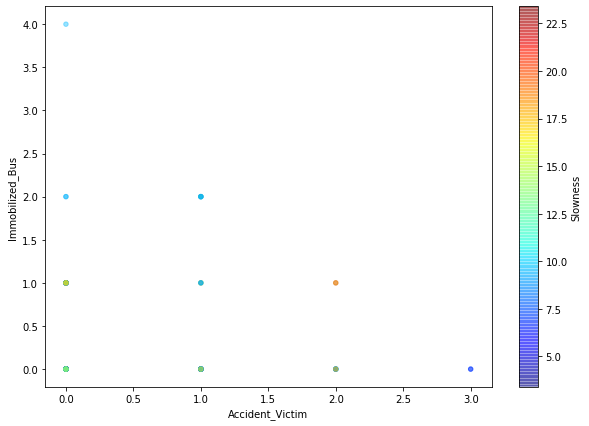

In [6]:
sf.plot(kind="scatter", x="Accident_Victim", y="Immobilized_Bus", alpha=0.4, figsize=(10,7),
    c="Slowness", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('map2.png')

Now let’s look at how much each independent variable correlates with the last sold price.

In [7]:
corr_matrix = sf.corr()
corr_matrix["Slowness"].sort_values(ascending=False)

Slowness                  1.000000
Hour                      0.729962
Electricity_Short         0.436569
Flooding                  0.420016
Semaphore_off             0.347242
Fire_Vehicles             0.134103
Broken_Truck              0.131998
Accident_Victim           0.121730
Immobilized_Bus           0.101143
Manifestations            0.066377
Freight_Occurrence        0.026791
Dangerous_Freight         0.000957
Running_Over             -0.001133
Vehicle_Excess           -0.045297
Fire                     -0.046737
Tree                     -0.098489
Intermittent_Semaphore   -0.119942
Trolleybuses_Defect      -0.147035
Name: Slowness, dtype: float64

The slowness in traffic (%) tends to go up when the hour and lack of electricity of bathrooms go up. You can see a small negative correlation between the dDefect in the network of trolleybuses and the slowness in traffic. Finally, coefficients close to zero mean that there is no linear correlation.

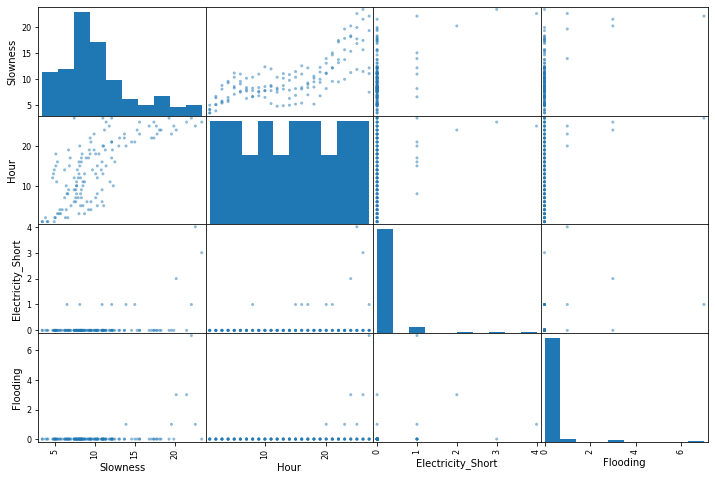

In [8]:
from pandas.plotting import scatter_matrix

attributes = ["Slowness", "Hour", "Electricity_Short", "Flooding"]
scatter_matrix(sf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

The most promising variable to predict the sold price is the zestimate, so let’s zoom in on their correlation scatterplot

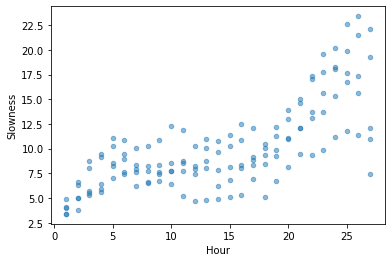

In [9]:
sf.plot(kind="scatter", x="Hour", y="Slowness", alpha=0.5)
plt.savefig('scatter.png')

First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.

In [10]:
sf.columns

Index(['Hour', 'Immobilized_Bus', 'Broken_Truck', 'Vehicle_Excess',
       'Accident_Victim', 'Running_Over', 'Fire_Vehicles',
       'Freight_Occurrence', 'Dangerous_Freight', 'Electricity_Short', 'Fire',
       'Flooding', 'Manifestations', 'Trolleybuses_Defect', 'Tree',
       'Semaphore_off', 'Intermittent_Semaphore', 'Slowness'],
      dtype='object')

In [11]:
sf = sf[['Hour', 'Immobilized_Bus', 'Broken_Truck', 'Vehicle_Excess',
       'Accident_Victim', 'Running_Over', 'Fire_Vehicles',
       'Freight_Occurrence', 'Dangerous_Freight', 'Electricity_Short', 'Fire',
       'Flooding', 'Manifestations', 'Trolleybuses_Defect', 'Tree',
       'Semaphore_off', 'Intermittent_Semaphore', 'Slowness']]
sf.head()

,Hour,Immobilized_Bus,Broken_Truck,Vehicle_Excess,Accident_Victim,Running_Over,Fire_Vehicles,Freight_Occurrence,Dangerous_Freight,Electricity_Short,Fire,Flooding,Manifestations,Trolleybuses_Defect,Tree,Semaphore_off,Intermittent_Semaphore,Slowness
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


Create dummy variables for two categorical variables.

In [12]:
X = sf[['Hour', 'Immobilized_Bus', 'Broken_Truck', 'Vehicle_Excess',
       'Accident_Victim', 'Running_Over', 'Fire_Vehicles',
       'Freight_Occurrence', 'Dangerous_Freight', 'Electricity_Short', 'Fire',
       'Flooding', 'Manifestations', 'Trolleybuses_Defect', 'Tree',
       'Semaphore_off', 'Intermittent_Semaphore']]
Y = sf['Slowness']

In [13]:
X.head()

,Hour,Immobilized_Bus,Broken_Truck,Vehicle_Excess,Accident_Victim,Running_Over,Fire_Vehicles,Freight_Occurrence,Dangerous_Freight,Electricity_Short,Fire,Flooding,Manifestations,Trolleybuses_Defect,Tree,Semaphore_off,Intermittent_Semaphore
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
X.shape

(135, 17)

In [15]:
Y.shape

(135,)

Standardization of the data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Done! We now have a working Linear Regression model.

In [19]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.4230


So, in our model, 42.30% of the variability in Y can be explained using X. It is not so exciting.

Calculate root-mean-square error (RMSE)

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 2.9915


Our model was able to predict the value of every record of behavior of the urban traffic in the test set within 2.9915% of the real slowness in traffic.

Calculate mean absolute error (MAE)

In [21]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 2.3364


let’s try a more complex model to see whether results can be improved - the RandomForestRegressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [23]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.4801


In [24]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 2.8398


Much better! Let's try one more.

In [25]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.4551


In [27]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 2.9072


I would consider the RandomForestRegressor as our final model, let's print out feature importance

In [28]:
feature_labels = np.array(['Hour', 'Immobilized_Bus', 'Broken_Truck', 'Vehicle_Excess',
       'Accident_Victim', 'Running_Over', 'Fire_Vehicles',
       'Freight_Occurrence', 'Dangerous_Freight', 'Electricity_Short', 'Fire',
       'Flooding', 'Manifestations', 'Trolleybuses_Defect', 'Tree',
       'Semaphore_off', 'Intermittent_Semaphore'])
importance = forest_reg.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Hour-76.77%
Electricity_Short-5.82%
Flooding-4.54%
Broken_Truck-4.47%
Immobilized_Bus-2.11%
Accident_Victim-2.00%
Semaphore_off-1.56%
Trolleybuses_Defect-1.10%
Running_Over-0.67%
Manifestations-0.44%
Tree-0.30%
Vehicle_Excess-0.21%
Intermittent_Semaphore-0.01%
Dangerous_Freight-0.01%
Fire_Vehicles-0.00%
Freight_Occurrence-0.00%
Fire-0.00%
